Imports

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

from math import exp
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import ttest_rel
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import ttest_1samp
from scipy.stats import mode
from scipy.stats import ttest_ind
from scipy.stats import norm

Import Data:

In [ ]:
# Path to data file (insert your own path) Chage the path to the actual path of the file at the exam
file_path = '/Users/balde/Desktop/Statestik/bmi1/bmi1_data.csv'

# Load data
D = pd.read_csv(file_path, sep=';')
D

Log Transform data

In [ ]:
D['LOG_DATA'] = np.log(D['DATA TO LOG TRANSFORM'])
D

Change LOG_DATA to the name you want your table to have, and DATA TO LOG TRANSFORM to the data from the data that should be log transformed.

Data Frame

In [12]:
# Sample data
data = np.random.normal(loc=50, scale=10, size=1000)  # Normal distribution data

# Convert to a DataFrame for ease of use with Seaborn
df = pd.DataFrame({'Value': data})

Mean

In [ ]:
column_name = 'height'  # Change this to the column you want to calculate the mean for
mean_value = D[column_name].mean()
print(f"Mean {column_name.capitalize()}: {mean_value}")

Median

In [19]:
median = np.median(data)
print(f"Median: {median}")

Median: 5.1


Mode

In [29]:
data = [1, 2, 2, 3, 4]
mode_result = mode(data, keepdims=True)  # keepdims ensures correct behavior in newer SciPy versions
mode_value = mode_result.mode[0]
print(f"Mode: {mode_value}")

Mode: 2


Range

In [30]:
data_range = max(data) - min(data)
print(f"Range: {data_range}")

Range: 3


Sample Variance

In [31]:
sample_variance = np.var(data, ddof=1)  # ddof=1 for sample variance
print(f"Sample Variance: {sample_variance}")

Sample Variance: 1.3


Population Variance

In [32]:
population_variance = np.var(data, ddof=0)
print(f"Population Variance: {population_variance}")

Population Variance: 1.04


Variance of discrete variables

In [ ]:
# Given values
X = [0, 1, 2, 3, 4]  # possible values of X
f_x = [0.17, 0.22, 0.28, 0, 0.33]  # probabilities of X
mean_X = 2.10  # given mean
# Calculate variance
variance_X = sum([f_x[i] * (X[i] - mean_X)**2 for i in range(len(X))])
print("Variance of X:", variance_X)

Standard Deviation (Sample)

In [33]:
sample_std = np.std(data, ddof=1)  # ddof=1 for sample std
print(f"Sample Standard Deviation: {sample_std}")

Sample Standard Deviation: 1.140175425099138


Standard Deviation (Population)

In [34]:
Population_std = np.std(data, ddof=0)
print(f"Population Standard Deviation: {Population_std}")

Population Standard Deviation: 1.019803902718557


Decrees of freedom

In [2]:
n_first = 5                     # Sample size for first group
df_for_single_sample = n_first - 1    # Degrees of freedom for single sample t-test

n_second = 3                    # Sample size for second group
df_for_two_sample = (n_first - 1) * (n_second - 1)  # if there is more than one sample (n-1)*(m-1)
print(f"Degrees of freedom for single sample t-test: {df_for_single_sample}")
print(f"Degrees of freedom for two sample t-test: {df_for_two_sample}")

Degrees of freedom for single sample t-test: 4
Degrees of freedom for two sample t-test: 8


z-Score (Standard Score)

In [15]:
data_point = 8
mean = 4
std_dev = 2
z_score = (data_point - mean) / std_dev
print(f"z-Score: {z_score}")

z-Score: 2.0


t-Statistic

In [18]:
data = [4.8, 5.2, 4.9, 5.1, 5.3]
population_mean = 5
t_stat, p_value = ttest_1samp(data, population_mean)
print(f"t-Statistic: {t_stat}, p-value: {p_value}")

t-Statistic: 0.646996639220636, p-value: 0.5528894339334139


Percentile

In [39]:
percentile_50 = np.percentile(data, 50)  # Median
print(f"50th Percentile (Median): {percentile_50}")

50th Percentile (Median): 2.0


Standard Error of the Mean (SEM)

In [37]:
sem = sample_std / np.sqrt(len(data))
print(f"Standard Error of the Mean: {sem}")

Standard Error of the Mean: 0.5099019513592785


Margin of Error

In [ ]:
#SEM needs to be run first
z_star = 1.96  # For 95% confidence
margin_of_error = z_star * sem
print(f"Margin of Error: {margin_of_error}")

Margin of Error: 0.9994078246641859


Poisson Distribution

In [4]:
# Example: Average rate (λ) = 10, k = 15
λ = 10
k = 15
poisson_prob = poisson.pmf(k, λ)
print(f"P(X = {k}) = {poisson_prob}")

P(X = 15) = 0.034718069630684245


Exponential Distribution

In [9]:
# Example: λ = 15/60 (15 cars/hour converted to minutes), t = 5
λ = 15 / 60
t = 5
exp_prob = exp(-λ * t)
print(f"P(T > {t}) = {exp_prob}")

P(T > 5) = 0.2865047968601901


NOVA (F-Statistic)

In [6]:
# Example: Three groups of scores
group1 = [88, 92, 85, 91]
group2 = [76, 81, 77, 80]
group3 = [90, 94, 92, 93]

f_stat, p_value = f_oneway(group1, group2, group3)
print(f"F-statistic: {f_stat}, p-value: {p_value}")

F-statistic: 33.34977578475336, p-value: 6.889241542814503e-05


Confidence Interval for Mean

In [ ]:
# Example: mean = 75, std = 10, n = 40, alpha = 0.05
mean = 75
std = 10
n = 40
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df=n-1)
margin_error = t_critical * (std / np.sqrt(n))
ci = (mean - margin_error, mean + margin_error)
print(f"Confidence Interval: {ci}")

Chi-Squared Test

In [ ]:
observed = [10, 12, 9, 11, 8, 10]  # Observed counts
expected = [10] * len(observed)  # Equal expected counts
chi2_stat, p_value, _, _ = chi2_contingency([observed, expected])
print(f"Chi-squared statistic: {chi2_stat}, p-value: {p_value}")

Expected count. Chi-Squared Test for independence

In [ ]:
# finding an expected value of a cell in a contingency table. 
row_total = 100
column_total = 50
grand_total = 200
expected = (row_total * column_total) / grand_total
print(f"Expected value: {expected}")

Linear Regression

In [ ]:
# Example: Batch sizes and costs
batch_sizes = [50, 100, 150, 200, 250]
costs = [2.33, 4.21, 6.01, 7.51, 8.46]

X = sm.add_constant(batch_sizes)  # Add intercept
model = sm.OLS(costs, X).fit()
print(model.summary())

R-Squared

In [ ]:
# Using Linear Regression Model Output
r_squared = model.rsquared
print(f"R-squared: {r_squared}")

Standard Error in Regression


In [ ]:
# Direct calculation of standard error
std_error = std / np.sqrt(n)
print(f"Standard Error: {std_error}")

Binomial Distribution

In [ ]:
# Example: n = 5, p = 0.5, k = 3
n = 5
p = 0.5
k = 3
binomial_prob = binom.pmf(k, n, p)
print(f"P(X = {k}) = {binomial_prob}")

Error Propagation

In [ ]:
# Example: K = x^2 + y, variances σx = 1, σy = 0.5
x = 2
y = 3
σx = 1
σy = 0.5

dK_dx = 2 * x
dK_dy = 1

variance_K = (dK_dx**2 * σx**2) + (dK_dy**2 * σy**2)
print(f"Variance of K: {variance_K}")

One-Sample z-Test

In [7]:
data = [50, 52, 48, 49, 51]
mu_0 = 50  # Hypothesized mean
sigma = 2  # Population standard deviation
n = len(data)

# Calculate sample mean
sample_mean = np.mean(data)

# Calculate z-statistic
z_stat = (sample_mean - mu_0) / (sigma / np.sqrt(n))

# Calculate p-value
p_value = 2 * (1 - norm.cdf(abs(z_stat)))  # Two-tailed test
print(f"z-Statistic: {z_stat}, p-value: {p_value}")

z-Statistic: 0.0, p-value: 1.0


One-Sample t-Test

In [6]:
data = [50, 52, 48, 49, 51]
mu_0 = 50  # Hypothesized mean

# Perform one-sample t-test
t_stat, p_value = ttest_1samp(data, mu_0)
print(f"t-Statistic: {t_stat}, p-value: {p_value}")

t-Statistic: 0.0, p-value: 1.0


Paired t-Test

In [5]:
# Example: Before and after scores
before = [85, 89, 93, 88, 91]
after = [86, 90, 92, 87, 89]

t_stat, p_value = ttest_rel(before, after)
print(f"Paired t-test: t-statistic = {t_stat}, p-value = {p_value}")

Paired t-test: t-statistic = 0.6666666666666667, p-value = 0.5414697392755848


Two-Sample t-Test (Independent Samples)

In [4]:
group1 = [50, 52, 48, 49, 51]
group2 = [45, 47, 46, 44, 46]

# Perform two-sample t-test
t_stat, p_value = ttest_ind(group1, group2)
print(f"t-Statistic: {t_stat}, p-value: {p_value}")

t-Statistic: 5.047146145152357, p-value: 0.000992766798748937


Bootstrap Quantile

In [3]:
# Example: Dataset
data = [1, 2, 3, 4, 5]
n_iterations = 1000
bootstrap_samples = [np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_iterations)]
ci = np.percentile(bootstrap_samples, [2.5, 97.5])
print(f"Bootstrap Confidence Interval: {ci}")

Bootstrap Confidence Interval: [1.8 4.2]


Histogram

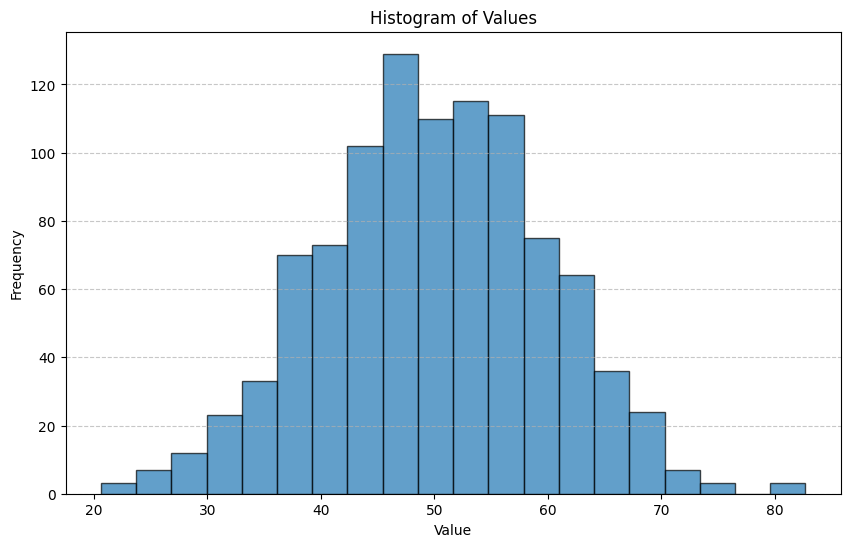

In [14]:
# Create a Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Value'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Box-plot

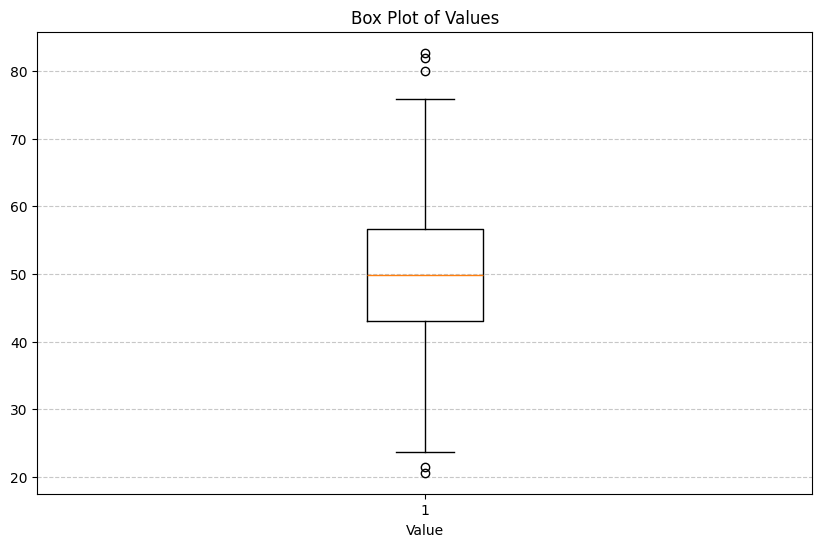

In [13]:
# Create a Box Plot
plt.figure(figsize=(10, 6))
plt.boxplot(x=df['Value'])
plt.title('Box Plot of Values')
plt.xlabel('Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()